In [ ]:
c = pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/chosun/chosun_word.csv",sep="\t",encoding="utf-8")
c = c.drop(columns=['section'], axis=1)
stopword = ['대한', '당시', '기준', '때문', '한편', '작년', '상황', '사건','통해','관련','오전','이상','지난해','기자','경우', '생각', '모습', '인상', '이번', '스포츠조선', '이후', '올해', '관련', '자신', '우리', '통해', '사진', '라며', '인상', '사람', '지난', '위해', '남자', '여자', '지난','대해','위해','통해','오전','오후']
s=""
for i in stopword:
    s+=i
    s+="|"
datafilter = c["word"].str.contains(s[:-1])
c = c[~datafilter]
c = c.nlargest(n=100,columns='count',keep='first')
c = dict(zip(c['word'].tolist(), c['count'].tolist()))
wc_img = wc.generate_from_frequencies(c) #
wc_img.to_file('cc.jpg')
plt.imshow(wc, interpolation = 'bilinear')


In [ ]:
c200 = c200.drop(columns=['section'], axis=1)

In [146]:
c = pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/chosun/chosun_word.csv",sep="\t",encoding="utf-8")

In [147]:
c = c.drop(columns=['section'], axis=1)

In [148]:
stopword = ['대한', '당시', '기준', '때문', '한편', '작년', '상황', '사건','통해','관련','오전','이상','지난해','기자','경우', '생각', '모습', '인상', '이번', '스포츠조선', '이후', '올해', '관련', '자신', '우리', '통해', '사진', '라며', '인상', '사람', '지난', '위해', '남자', '여자', '지난','대해','위해','통해','오전','오후']

In [149]:
s=""
for i in stopword:
    s+=i
    s+="|"

In [150]:
s[:-1]

'대한|당시|기준|때문|한편|작년|상황|사건|통해|관련|오전|이상|지난해|기자|경우|생각|모습|인상|이번|스포츠조선|이후|올해|관련|자신|우리|통해|사진|라며|인상|사람|지난|위해|남자|여자|지난|대해|위해|통해|오전|오후'

In [151]:
datafilter = c["word"].str.contains(s[:-1])

In [152]:
c = c[~datafilter]

In [153]:
c = c.nlargest(n=100,columns='count',keep='first')

In [154]:
c = dict(zip(c['word'].tolist(), c['count'].tolist()))
#c100.to_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/c200.csv")

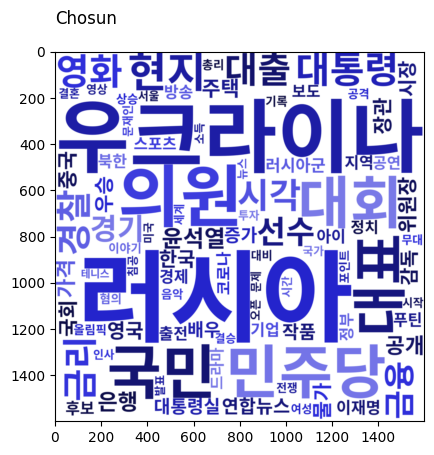

In [175]:
wc_img = wc.generate_from_frequencies(c) #

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(240,70%%, %d%%)" % np.random.randint(15,70))   ## 색상코드/숫자를 조정해보세요
                                                            ## hsl 색상코드 참고
plt.title('Chosun', loc='left', pad=20)

plt.imshow(wc_img.recolor(color_func = grey_color_func),interpolation="bilinear")

wc_img.to_file('cc.jpg')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt

In [60]:
c= pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/chosun/chosun_senti.csv",sep="\t",encoding="utf-8")

In [5]:
# chosun_senti['section'].unique() # 경제', '정치', '사회', '국제', '스포츠', '연예', '문화

In [8]:
tokenizer = Okt()
stop_words = ['위','첫','전','오늘','승','팀','최','골','시즌','리그','연속','감독','세계','것','강','명','최고','차','점','찬','더','등','호','황']
c["tokenized"] = c["title"].apply(str).apply(tokenizer.nouns)
c['tokenized'] = c['tokenized'].apply(lambda x: [item for item in x if item not in stop_words and len(item) > 1])

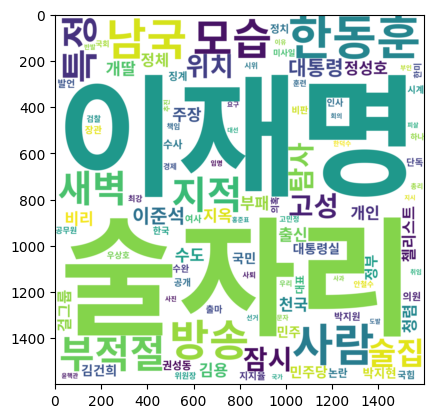

In [11]:
#정치
c_pol = c[c['section'].str.contains('정치')] ####
c_pol[c_pol['section']=='title']['tokenized'].values
c_pol = np.hstack(c_pol[c_pol['section']=='정치']['tokenized'].values) ####
c_pol = Counter(c_pol)#
c_pol = c_pol.most_common(100)#
c_pol= dict(c_pol)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(c_pol) #
wc_img.to_file('c_pol.jpg')
plt.imshow(wc, interpolation = 'bilinear')

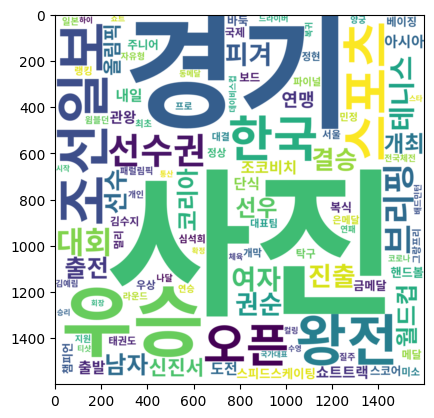

In [13]:
#스포츠,
c_spo = c[c['section'].str.contains('스포츠')] ####
c_spo[c_spo['section']=='title']['tokenized'].values
c_spo = np.hstack(c_spo[c_spo['section']=='스포츠']['tokenized'].values) ####
c_spo = Counter(c_spo)####
c_spo = c_spo.most_common(100)####
c_spo= dict(c_spo)#####
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(c_spo) #
wc_img.to_file('c_spo.jpg') ##########@@@@@@@@@@@@@@@@@@@@
plt.imshow(wc, interpolation = 'bilinear')

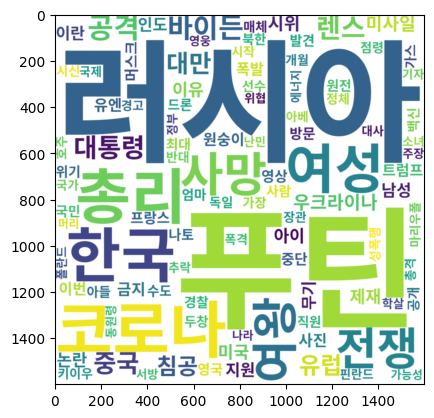

In [14]:
#국제,
c_int = c[c['section'].str.contains('국제')] ####
c_int[c_int['section']=='title']['tokenized'].values
c_int = np.hstack(c_int[c_int['section']=='국제']['tokenized'].values) ####
c_int = Counter(c_int)#
c_int = c_int.most_common(100)#
c_int= dict(c_int)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(c_int) #
wc_img.to_file('c_int.jpg')
plt.imshow(wc, interpolation = 'bilinear')

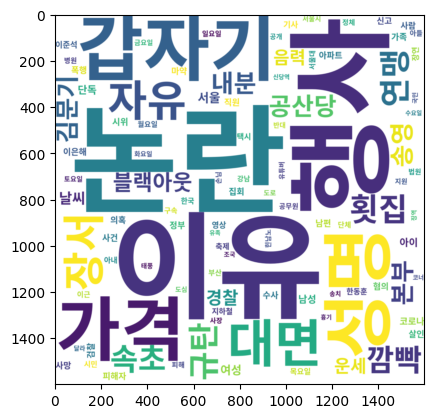

In [15]:
#사회

c_soc = c[c['section'].str.contains('사회')] ####
c_soc[c_soc['section']=='title']['tokenized'].values
c_soc = np.hstack(c_soc[c_soc['section']=='사회']['tokenized'].values) ####
c_soc = Counter(c_soc)#
c_soc = c_soc.most_common(100)#
c_soc = dict(c_soc)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(c_soc) #
wc_img.to_file('c_soc.jpg')
plt.imshow(wc, interpolation = 'bilinear')

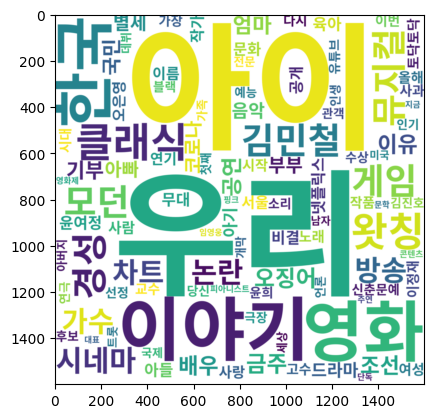

In [16]:
#문화 

c_cul = c[c['section'].str.contains('문화')] ####
c_cul[c_cul['section']=='title']['tokenized'].values
c_cul = np.hstack(c_cul[c_cul['section']=='문화']['tokenized'].values) ####
c_cul = Counter(c_cul)#
c_cul = c_cul.most_common(100)#
c_cul= dict(c_cul)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(c_cul) #
wc_img.to_file('c_cul.jpg')
plt.imshow(wc, interpolation = 'bilinear')

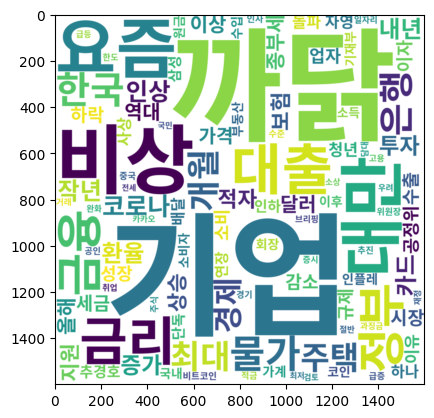

In [17]:
#경제  
c_eco = c[c['section'].str.contains('경제')] ####
c_eco[c_eco['section']=='title']['tokenized'].values
c_eco = np.hstack(c_eco[c_eco['section']=='경제']['tokenized'].values) ####
c_eco = Counter(c_eco)#
c_eco = c_eco.most_common(100)#
c_eco= dict(c_eco)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(c_eco) #
wc_img.to_file('c_eco.jpg')
plt.imshow(wc, interpolation = 'bilinear')

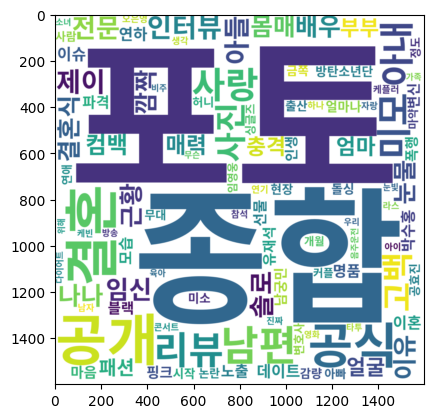

In [19]:
#연예 = 
c_ent = c[c['section'].str.contains('연예')] ####
c_ent[c_ent['section']=='title']['tokenized'].values
c_ent = np.hstack(c_ent[c_ent['section']=='연예']['tokenized'].values) ####
c_ent = Counter(c_ent)#
c_ent = c_ent.most_common(100)#
c_ent= dict(c_ent)#
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600,
)
wc_img = wc.generate_from_frequencies(c_ent) #
wc_img.to_file('c_ent.jpg')
plt.imshow(wc, interpolation = 'bilinear')